# Problem 1

For the given non-linear problem, the KKT conditions are:

**Primal feasibility:** $h_i(x) \geq 0, \forall i \in [1, m]$ and $x_L \leq x \leq x_U$.

**Dual feasibility:** In this case, $\mu$ represent our dual veriables, and for dual feasibility, $\mu_i \geq 0, \forall i \in [1, m]$.

**Stationarity conditions:** Since there are no equalities, the Lagrangian, $L(x, \mu) = f(x) + \sum_{i = 1}^m \mu_i h_i(x)$. So, the gradient of the Lagrangian with respect to $x$ must be zero: $\nabla L(x, \mu) = \nabla f(x) + \sum_{i = 1}^m \mu_i \nabla h_i(x) = 0$.

**Complementary Slackness:** Given from lecture, $\mu_ih_i(x) = 0, \forall i \in [1, m]$.





# Problem 2

part a.
From the code and the plot below, the optimal solution is somewhere around $(x_1, x_2) \approx (1.8, 2.5)$.

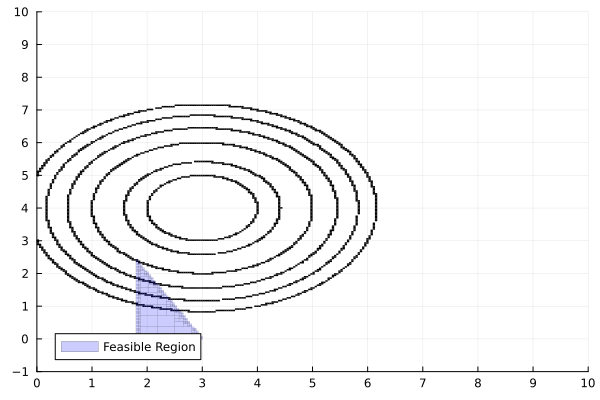

In [2]:
using Plots, ImplicitEquations, LaTeXStrings

# most of the code from tutorial 3
# objective function
f(x, y) = (x - 3) ^ 2 + (y - 4) ^ 2

# constraints: g(x) <= 0
g1(x, y) = 2x + y - 6
g2(x, y) = x - y - 4
g3(x, y) = 1.8 - x
g4(x, y) = -y

# list of values on the contour plot
f_values = [0, 1, 2, 4, 6, 8, 10]

# plotting
lower_x = 0
upper_x = 10
lower_y = -1
upper_y = 10
step_size = 1

plot(xlims = (lower_x, upper_x), ylims = (lower_y, upper_y), 
    xticks = lower_x:step_size:upper_x, yticks = lower_y:step_size:upper_y,
    label = "")

# contour plot for the objective function
for v in f_values
    plot!(f ⩵ v, xlims = (lower_x, upper_x), ylims = (lower_y, upper_y), 
    linewidth = 0.1, 
    label = "",
    )
end

# feasible region
r = (g1 ≦ 0) & (g2 ≦ 0) & (g3 ≦ 0) & (g4 ≦ 0)
plot!(r, xlims=(lower_x, upper_x), ylims=(lower_y, upper_y), fillcolor = :blue, 
    fillalpha = 0.2, 
    label = "Feasible Region",
    legend = :bottomleft,
)

In [4]:
# part b
using Flux, LinearAlgebra

# 2x + 0y = 6
# 0x + 2y = 8

# 2x + 1y = 6
# 1x - 1y = 4
# 1x + 0y = 1.8
# 0x - 1y = 0
# these are rearranged to be easily processed as a matrix
v_f1 = [2, 0]
b_f1 = 6
v_f2 = [0, 2]
b_f2 = 8

v_g1 = [2, 1]
b_g1 = 6
v_g2 = [1, -1]
b_g2 = 4
v_g3 = [1, 0]
b_g3 = 1.8
v_g4 = [0, -1]
b_g4 = 0

# culminated vectors for each constraint 
v_g = [[2, 1], [1, -1], [1, 0], [0, -1]]
b_g = [6, 4, 1.8, 0]

# active_set function
function active_set(max_iter)
    
    # number of gradients in our objective function
    objective = 2
    
    # A to be empty set and all μ = 0 for all i's (implied since its what were solving for)
    A = []
    
    # iterate max_iter times
    for iter in 1 : max_iter
        
        # how many constraints are active is how many indices are in A
        active_len = length(A)
        
        # new size of the matrix is determined by the number of gradients and the constraints
        size = objective + active_len
        
        # make the empty matrix and b vector
        mat = zeros(Float64, size, size)
        b = zeros(Float64, size, 1)
        
        # gradient objective function
        mat[1, 1 : 2] = v_f1
        mat[2, 1 : 2] = v_f2
        b[1] = b_f1
        b[2] = b_f2
        
        # each active constraint
        for (i, index) in enumerate(A)
            
            # get each active constraint
            v_active = v_g[index]
            b_active = b_g[index]
            
            # should be added accordingly
            mat[2 + i, 1 : 2] = v_active
            mat[1, 2 + i] = v_active[1]
            mat[2, 2 + i] = v_active[2]
            b[2 + i] = b_active
            
        end
        
        # solves system of equations
        res = mat \ b
        x = res[1]
        y = res[2]
    
        # violations are when the constraints are positive
        violations = [g1(x, y), g2(x, y), g3(x, y), g4(x, y)]
        
        # if they are positive and not in A, we should make it active
        if maximum(violations) > 0
            index = argmax(violations)
            if index ∉ A
                println("Constraint ", index, " now active.")
                push!(A, index)
                    
            end
            
        # otherwise we have our solution
        else
            return x, y, res
            
        end
    end    
end
            
# init
max_iter = 3

x, y, res = active_set(max_iter)
solution = (x, y)
optimal_value = f(x, y)
println("Optimal Solution: ", solution)
println("Optimal Objective Value: ", optimal_value)

Constraint 1 now active.
Constraint 3 now active.
Optimal Solution: (1.8000000000000003, 2.3999999999999995)
Optimal Objective Value: 4.000000000000001


The constraints g1 and g3 are active according to the code. The gradients of the objective function are as follows:

$\frac{\partial f}{\partial x_1} = 2(x_1 - 3),$ 
$\frac{\partial f}{\partial x_2} = 2(x_2 - 4).$ 

At the optimal solution from the above code block, $\vec{x} = (1.8, 2.4)$, $\left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}\right) = (-2.4, -3.2)$

In order to plot the direction of this gradient, we can offset $\vec{x^*} - \nabla f$ to get two points: $(1.8, 2.4), (4.2, 5.6)$. In slope-intercept form and simplifying, we can get $x_2 = \frac{4x_1}{3}$, which represents the line the gradient lies on.

The two constraints have equations:

$x_2 \leq -2x_1 + 6,$

$1.8 \leq x_1.$

The graph can be shown here: https://www.desmos.com/3d/14e7fd22af, and the image below (axes $x_2$ vs. $x_1$).
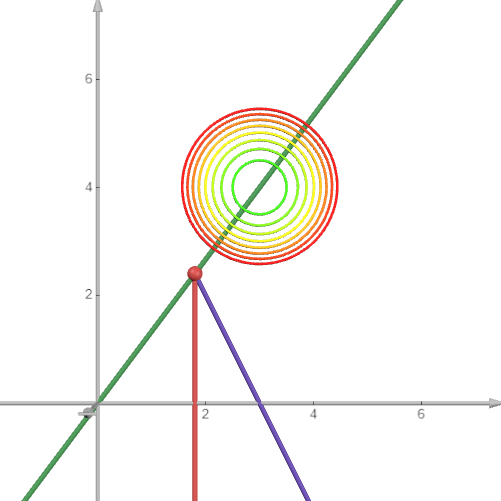

In [32]:
# part c
using JuMP, GAMS

# most of the code from tutorial 3
model = Model(GAMS.Optimizer)

@variables(model, begin 
    x >= 1.8
    y >= 0
end)

@constraints(model, begin
    2*x + y - 6 <= 0
    x - y - 4<= 0
end)

@objective(model, Min, (x - 3) ^ 2 + (y - 4) ^ 2)

print(model)

optimize!(model)

println("The objective value is: ", objective_value(model))
println("x_1 = ", value.(x))
println("x_2 = ", value.(y))

--- Job moi.gms Start 10/25/23 20:05:49 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_fJCe6x\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_fJCe6x\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_fJCe6x\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(55) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(18) 4 Mb
--- Generating QCP model m
--

[ Info: Updated GAMS model type: UNDEFINED -> QCP


We can see that the objective value and the solution coordinates are roughly the same!

part d. By inspection of the plot in a., we can see that this point is the closest point to the global minimum of the objective function. So, this optimal solution is a unique solution.

For any other point on the triangle, the distance from the calculated optimal point is farther away from the global minimum than the optimal solution.

# Problem 3

part a. The Taylor series expansion of $f(x) \approx f(x_k) + \nabla f(x_k)^T(x - x_k) + \frac{1}{2}(x - x_k)^T \nabla^2f(x_k)(x - x_k)+...$ Since we only care about the expansion up to the quadratic term, we can just say: $f(x) = f(x_k) + \nabla f(x_k)^T(x - x_k) + \frac{1}{2}(x - x_k)^T \nabla^2f(x_k)(x - x_k),$ and we can define $x - x_k = p_{x,k}$.

So, $f(x) - f(x_k) = \nabla f(x_k)^T(x - x_k) + \frac{1}{2}(x - x_k)^T \nabla^2f(x_k)(x - x_k) \rightarrow \nabla f(x_k)^T(p_{x,k}) + \frac{1}{2}(p_{x,k})^T \nabla^2f(x_k)(p_{x,k}).$

Next, given $Ax = b$, rearranging $x - x_k = p_{x,k} \rightarrow x = x_k + p_{x,k}$. So, we can rewrite the equality as $A(x_k + p_{x,k}) = Ax_k + Ap_{x,k} = b$. Then, subtracting the b to get an equality to 0: $Ax_k + Ap_{x,k} - b = 0$.

Finally, since $x - x_k = p_{x,k}$ has to hold, the size of $p_{x,k}$ must be the same as the size of $x$, so $p_{x,k} \in \mathbb{R}^n$.

part b. 

In SQP, the predicted step is $x_{k+1} = x_k + \alpha p_{k, x}$. $p_{k, x}$ is found by solving the objective function.

In RD, the predicted step is $x_{k+1} = x_k + \alpha p_k$. $p_k = 
\begin{bmatrix}
p_y \\
p_u
\end{bmatrix}$, and $H_{R, k} p_u = -g_{R,k}.$

The update functions for both methods are the same, but the variable $p$ is slightly different for each approach. In SQP, the step is found by minimizing the objective function, while in RD, the step is found by a Newton step that requires the reduced gradient and Hessian (and possibly even more different if we want to estimate the Hessian).



# Problem 4

$V = \pi r^2h = 25 m^3$

$C_{wall} = 150 (m^2)$

$C_{top} = 190 (m^2)$

$C_{bottom} = 260 (m^2)$

The total cost: $C = 2 \pi rh * 150 + \pi r^2 * 190 + \pi r^2 * 260 = 300 \pi rh + 450\pi r^2$

For our NLP, we want to minimize cost subject to the volume constraint (since this is a real system, $r, h > 0$, JuMP does not take strict inequalities, so I set it to a small number larger than 0).

In [36]:
model_SNOPT = Model(optimizer_with_attributes(GAMS.Optimizer))
set_optimizer_attribute(model_SNOPT, "nlp", "SNOPT")

@variables(model_SNOPT, begin 
    r >= 0.01
    h >= 0.01
end)

@NLconstraint(model_SNOPT, π * r ^ 2 * h == 25)

@objective(model_SNOPT, Min, 300 * π * r * h + 450 * π * r^2)

print(model_SNOPT)

optimize!(model_SNOPT)

--- Job moi.gms Start 10/25/23 20:48:28 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    NLP snopt
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_osi0Vd\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_osi0Vd\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_osi0Vd\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(54) 3 Mb
--- Starting execution: elapsed 0:00:00.006
--- moi.gms(17) 4 Mb
--- Generating 

[ Info: Updated GAMS model type: UNDEFINED -> NLP


In [37]:
println("Using SNOPT, The minimum cost is: ", objective_value(model_SNOPT))
println("r = ", value.(r))
println("h = ", value.(h))

Using SNOPT, The minimum cost is: 8126.986943407423
r = 1.3842768649072699
h = 4.152830586785128


In [38]:
model_MINOS = Model(optimizer_with_attributes(GAMS.Optimizer))
set_optimizer_attribute(model_MINOS, "nlp", "MINOS")

@variables(model_MINOS, begin 
    r >= 0.01
    h >= 0.01
end)

@NLconstraint(model_MINOS, π * r ^ 2 * h == 25)

@objective(model_MINOS, Min, 300 * π * r * h + 450 * π * r^2)

print(model_MINOS)

optimize!(model_MINOS)

--- Job moi.gms Start 10/25/23 20:48:28 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    NLP minos
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_hcKF2Q\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_hcKF2Q\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_hcKF2Q\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(54) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(17) 4 Mb
--- Generating 

    98     1  1.0e+00  8.13245e+03 7.9e-01 4.6e+02    1    342 1.0e-04     0
    99     1  1.0e+00  8.09834e+03 3.4e-01 7.6e+01    1    345 1.0e-04     0
   100     2  1.0e+00  8.12451e+03 2.4e-02 1.5e+00    1    354 1.0e-04     0
 Major minor  step     objective  Feasible Optimal  nsb   ncon penalty BSswp
   101     4  1.0e+00  8.12698e+03 3.1e-05 2.0e-03    1    362 1.0e-04     0
   102     1  1.0e+00  8.12699e+03 7.3e-11 6.6e-08    1    365 1.0e-04     1

 EXIT - Optimal Solution found, objective: 8126.99

--- Reading solution for model m
--- GDX Point C:\Users\maste\AppData\Local\Temp\gams_jl_hcKF2Q\m_p.gdx
--- Executing after solve: elapsed 0:00:00.058
--- moi.gms(54) 4 Mb
--- GDX File (execute_unload) C:\Users\maste\AppData\Local\Temp\gams_jl_hcKF2Q\m_stats.gdx
*** Status: Normal completion
--- Job moi.gms Stop 10/25/23 20:48:28 elapsed 0:00:00.059


[ Info: Updated GAMS model type: UNDEFINED -> NLP


In [39]:
println("Using MINOS, The minimum cost is: ", objective_value(model_MINOS))
println("r = ", value.(r))
println("h = ", value.(h))

Using MINOS, The minimum cost is: 8126.986943401118
r = 1.3842768640062326
h = 4.152830592181689


In [40]:
model_IPOPT = Model(optimizer_with_attributes(GAMS.Optimizer))
set_optimizer_attribute(model_IPOPT, "nlp", "IPOPT")

@variables(model_IPOPT, begin 
    r >= 0.01
    h >= 0.01
end)

@NLconstraint(model_IPOPT, π * r ^ 2 * h == 25)

@objective(model_IPOPT, Min, 300 * π * r * h + 450 * π * r^2)

print(model_IPOPT)

optimize!(model_IPOPT)

--- Job moi.gms Start 10/25/23 20:48:29 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    NLP ipopt
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_ffxOkU\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_ffxOkU\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_ffxOkU\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(54) 3 Mb
--- Starting execution: elapsed 0:00:00.004
--- moi.gms(17) 4 Mb
--- Generating 

[ Info: Updated GAMS model type: UNDEFINED -> NLP



--- moi.gms(20) 4 Mb
--- Executing IPOPT (Solvelink=5): elapsed 0:00:00.060

COIN-OR Ipopt    45.1.0 88bbff72 Oct 14, 2023          WEI x86 64bit/MS Window

COIN-OR Interior Point Optimizer (Ipopt Library 3.14.12)
written by A. Waechter.

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.6.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lowe

  93  1.0419611e+04 1.79e+01 1.45e+04   1.0 3.14e+03    -  3.30e-01 1.98e-03h  9
  94  1.0426000e+04 1.78e+01 1.45e+04   1.0 3.19e+03    -  1.00e+00 2.01e-03h  9
  95  1.0434636e+04 1.78e+01 1.45e+04   1.0 3.94e+03    -  4.56e-01 2.19e-03h  9
  96  1.0444610e+04 1.78e+01 1.45e+04   1.0 4.31e+03    -  1.00e+00 2.31e-03h  9
  97  1.0458777e+04 1.77e+01 1.44e+04   1.0 5.32e+03    -  4.86e-01 2.66e-03h  9
  98  1.0474768e+04 1.77e+01 1.44e+04   1.0 5.65e+03    -  1.00e+00 2.83e-03h  9
  99 -1.3416572e+03 2.40e+03 2.01e+03   1.0 6.36e+03    -  3.86e-01 9.45e-01H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 -1.0829992e+03 2.32e+03 1.94e+03   1.0 1.01e+04    -  2.83e-02 2.56e-02h  5
 101  3.6237846e+01 4.48e+01 4.62e+03   1.0 8.34e+03    -  1.00e+00 1.34e-01h  1
 102  3.4233219e+01 2.50e+01 1.74e+02   1.0 3.73e+04   0.0 5.78e-05 1.37e-04h  1
 103  3.4181738e+01 2.50e+01 1.70e+02   0.3 4.83e+04   2.2 1.08e-06 1.07e-06f  2
 104  3.4180640e+01 2.50e+01

In [41]:
println("Using IPOPT, The minimum cost is: ", objective_value(model_IPOPT))
println("r = ", value.(r))
println("h = ", value.(h))

Using IPOPT, The minimum cost is: 8126.986943411609
r = 1.3842768640254657
h = 4.152830592078399


SNOPT:
- Solution time: $0.015 - 0.008 = 0.007$ seconds 
- Major iterations: 34
- Minor iterations: 44 (summing all iterations under "minor")

MINOS:
- Solution time: $0.033 - 0.007 = 0.026$ seconds
- Major iterations: 102
- Minor iterations: 107 (summing all iterations under "minor")

IPOPT:
- Solution time: $0.256 - 0.008 = 0.248$ seconds
- Major iterations: N/A
- Minor iterations: N/A